In [ ]:
from sklearn import datasets
import numpy as np
# 生成数据，x是特征，y是标签，n_samples是样本数量，noise是噪声，random_state是随机种子
x, y = datasets.make_moons(n_samples=50000, noise=0.3, random_state=42) # make_moons是生成半月形数据
print(x.shape)
print(y.shape)
print(np.unique(y))

(50000, 2)
(50000,)
[0 1]


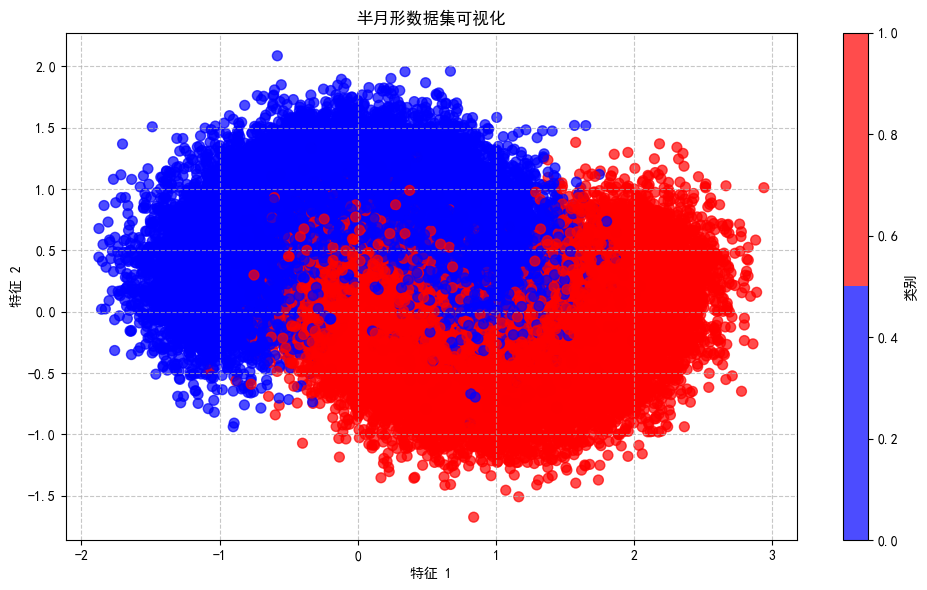

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建一个散点图来可视化数据
plt.figure(figsize=(10, 6))
# 创建红蓝配色方案
colors = ListedColormap(['blue', 'red'])
# 使用scatter函数创建散点图
# x[:, 0]：选取所有样本的第一个特征作为x轴坐标
# x[:, 1]：选取所有样本的第二个特征作为y轴坐标
# c=y：根据标签y的值来确定点的颜色，与前面定义的colors色图对应
# cmap=colors：使用前面定义的ListedColormap，将类别0映射为蓝色，类别1映射为红色
# s=50：设置点的大小为50
# alpha=0.7：设置点的透明度为0.7，使重叠的点可以被看到
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=colors, s=50, alpha=0.7)
plt.colorbar(label='类别')
plt.title('半月形数据集可视化')
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
# 并行集成
from sklearn.model_selection import train_test_split  # 导入数据集划分工具
from sklearn.linear_model import LogisticRegression  # 导入逻辑回归模型
from sklearn.svm import SVC  # 导入支持向量机模型
from sklearn.tree import DecisionTreeClassifier  # 导入决策树分类器
from sklearn.metrics import accuracy_score  # 导入准确率评估指标
import numpy as np  # 导入numpy库用于数值计算

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 将数据集划分为80%训练集和20%测试集，设置随机种子为42

# 创建三个基分类器
lr = LogisticRegression(max_iter=1000)  # 创建逻辑回归模型，设置最大迭代次数为1000
svc = SVC(kernel='rbf', probability=True)  # 创建支持向量机模型，使用径向基函数核，启用概率输出
dt = DecisionTreeClassifier(max_depth=5)  # 创建决策树分类器，设置最大深度为5

# 训练基分类器
print("训练基分类器...")  # 打印训练开始提示
lr.fit(X_train, y_train)  # 训练逻辑回归模型
svc.fit(X_train, y_train)  # 训练支持向量机模型
dt.fit(X_train, y_train)  # 训练决策树模型

# 在测试集上评估基分类器性能
lr_pred = lr.predict(X_test)  # 使用逻辑回归模型预测测试集
svc_pred = svc.predict(X_test)  # 使用支持向量机模型预测测试集
dt_pred = dt.predict(X_test)  # 使用决策树模型预测测试集

print(f"逻辑回归 准确率: {accuracy_score(y_test, lr_pred):.4f}")  # 打印逻辑回归模型的准确率，保留4位小数
print(f"SVC 准确率: {accuracy_score(y_test, svc_pred):.4f}")  # 打印支持向量机模型的准确率，保留4位小数
print(f"决策树 准确率: {accuracy_score(y_test, dt_pred):.4f}")  # 打印决策树模型的准确率，保留4位小数

# 实现投票法集成
print("\n实现投票法集成...")  # 打印投票法集成开始提示
# 硬投票（多数投票）
ensemble_hard_pred = np.zeros(len(y_test))  # 创建一个与测试集大小相同的零数组，用于存储硬投票结果
for i in range(len(y_test)):  # 遍历测试集中的每个样本
    votes = [lr_pred[i], svc_pred[i], dt_pred[i]]  # 获取三个模型对当前样本的预测结果
    # 统计票数，选择票数最多的类别
    ensemble_hard_pred[i] = np.argmax(np.bincount(votes))  # 使用bincount统计各类别票数，选择票数最多的类别作为最终预测

print(f"硬投票集成准确率: {accuracy_score(y_test, ensemble_hard_pred):.4f}")  # 打印硬投票集成的准确率，保留4位小数

# 软投票（概率平均）
lr_proba = lr.predict_proba(X_test)  # 获取逻辑回归模型的预测概率
svc_proba = svc.predict_proba(X_test)  # 获取支持向量机模型的预测概率
dt_proba = dt.predict_proba(X_test)  # 获取决策树模型的预测概率

# 计算平均概率
ensemble_soft_proba = (lr_proba + svc_proba + dt_proba) / 3  # 计算三个模型预测概率的平均值
ensemble_soft_pred = np.argmax(ensemble_soft_proba, axis=1)  # 选择平均概率最高的类别作为最终预测

print(f"软投票集成准确率: {accuracy_score(y_test, ensemble_soft_pred):.4f}")  # 打印软投票集成的准确率，保留4位小数



训练基分类器...
逻辑回归 准确率: 0.8535
SVC 准确率: 0.9123
决策树 准确率: 0.9054

实现投票法集成...
硬投票集成准确率: 0.9123
软投票集成准确率: 0.9078


In [18]:
# lr_pred = lr.predict(X_test)
# svc_pred = svc.predict(X_test)
# dt_pred = dt.predict(X_test)

# 手动实现硬投票集成学习,lr_read,svc_read,dt_read是三个分类器的预测结果
# 这行代码实现了硬投票集成学习的决策过程：
# 1. lr_read, svc_read, dt_read 是三个基分类器的预测结果（0或1）
# 2. 将三个预测结果相加，得到的值范围是0-3
# 3. 判断总和是否大于等于2，即至少有2个分类器预测为1
# 4. 如果大于等于2，则集成结果为1；否则为0
# 5. np.array(..., dtype='int')将布尔结果转换为整数（0或1）
ensemble_pred = np.array((lr_pred+svc_pred+dt_pred)>=2,dtype='int') 
# 计算手动集成学习的准确率
ensemble_accuracy = np.mean(ensemble_pred == y_test)
print(f"手动硬投票集成学习准确率: {ensemble_accuracy:.4f}")


手动硬投票集成学习准确率: 0.9123


In [19]:
# 使用sklearn实现软投票集成分类器
from sklearn.ensemble import VotingClassifier

# 创建软投票集成分类器
# 参数说明：
# - estimators: 包含多个基础分类器的列表，每个元素为(名称, 分类器)的元组
# - voting: 'soft'表示使用预测概率进行加权投票
# - weights: 可选参数，为每个分类器分配权重，这里我们使用相等权重
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('svc', svc), ('dt', dt)],
    voting='soft'
)

# 使用训练数据拟合集成分类器
voting_clf.fit(X_train, y_train)

# 在测试集上进行预测
voting_pred = voting_clf.predict(X_test)

# 计算并打印集成分类器的准确率
voting_accuracy = accuracy_score(y_test, voting_pred)
print(f"sklearn软投票集成分类器准确率: {voting_accuracy:.4f}")



sklearn软投票集成分类器准确率: 0.9079


In [ ]:
# 导入Bagging集成学习分类器
from sklearn.ensemble import BaggingClassifier
# 导入决策树分类器作为基分类器
from sklearn.tree import DecisionTreeClassifier

# 创建基分类器 - 决策树，设置随机种子为42确保结果可复现
base_estimator = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器实例
# 参数说明:
# - estimator: 基分类器，这里使用决策树 (注意：新版本sklearn中使用estimator而不是base_estimator)
# - n_estimators: 集成中基分类器的数量，设置为100个
# - max_samples: 每个基分类器训练时使用的样本比例，这里设为80%的训练数据
# - bootstrap: True表示有放回抽样，使每个基分类器的训练集有差异
# - random_state: 随机种子，设为42确保结果可复现
bagging_clf = BaggingClassifier(
    estimator=base_estimator,       # 使用前面定义的决策树作为基分类器
    n_estimators=100,               # 使用100个基分类器
    max_samples=0.8,                # 每个基分类器使用80%的训练样本
    bootstrap=True,                 # 使用有放回抽样
    random_state=42,                # 设置随机种子
    oob_score=True                  # 没有抽样到的样本准确率
)

# 使用训练数据拟合Bagging分类器模型
bagging_clf.fit(X_train, y_train)

# 使用训练好的模型在测试集上进行预测
bagging_pred = bagging_clf.predict(X_test)

# 计算Bagging分类器在测试集上的准确率
bagging_accuracy = accuracy_score(y_test, bagging_pred)
# 打印Bagging分类器的准确率，保留4位小数
print(f"Bagging决策树集成分类器准确率: {bagging_accuracy:.4f}")

# 打印袋外(OOB)评分，这是使用未参与训练的样本评估的准确率
print(f"Bagging决策树集成分类器OOB评分: {bagging_clf.oob_score_:.4f}")


# 使用训练数据拟合决策树模型
base_estimator.fit(X_train, y_train)
# 在测试集上进行预测
tree_pred = base_estimator.predict(X_test)
# 计算单个决策树的准确率
tree_accuracy = accuracy_score(y_test, tree_pred)
# 打印单个决策树的准确率，保留4位小数
print(f"单个决策树分类器准确率: {tree_accuracy:.4f}")

# 比较单个决策树与Bagging集成的性能差异
print(f"Bagging相对于单个决策树的准确率提升: {bagging_accuracy - tree_accuracy:.4f}")



Bagging决策树集成分类器准确率: 0.9038
Bagging决策树集成分类器OOB评分: 0.9024
单个决策树分类器准确率: 0.8721
Bagging相对于单个决策树的准确率提升: 0.0317


In [24]:
# 创建使用无放回抽样的Bagging分类器
# 参数说明:
# - estimator: 基分类器，使用决策树
# - n_estimators: 集成中基分类器的数量，设置为100个
# - max_samples: 每个基分类器训练时使用的样本比例，这里设为80%的训练数据
# - bootstrap: False表示无放回抽样，每个样本在每个基分类器中最多使用一次
# - random_state: 随机种子，设为42确保结果可复现
bagging_no_replacement = BaggingClassifier(
    estimator=base_estimator,       # 使用前面定义的决策树作为基分类器
    n_estimators=100,               # 使用100个基分类器
    max_samples=0.8,                # 每个基分类器使用80%的训练样本
    bootstrap=False,                # 使用无放回抽样
    random_state=42                 # 设置随机种子
)

# 使用训练数据拟合无放回抽样的Bagging分类器模型
bagging_no_replacement.fit(X_train, y_train)

# 使用训练好的模型在测试集上进行预测
bagging_no_replacement_pred = bagging_no_replacement.predict(X_test)

# 计算无放回抽样Bagging分类器在测试集上的准确率
bagging_no_replacement_accuracy = accuracy_score(y_test, bagging_no_replacement_pred)
# 打印无放回抽样Bagging分类器的准确率，保留4位小数
print(f"无放回抽样Bagging决策树集成分类器准确率: {bagging_no_replacement_accuracy:.4f}")

# 比较有放回抽样与无放回抽样的Bagging性能差异
print(f"无放回抽样相对于有放回抽样的准确率差异: {bagging_no_replacement_accuracy - bagging_accuracy:.4f}")


无放回抽样Bagging决策树集成分类器准确率: 0.8938
无放回抽样相对于有放回抽样的准确率差异: -0.0100


In [27]:
# 添加njobs参数并统计训练时间
import time
from joblib import parallel_backend

# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 不使用并行计算（单线程）
start_time_single = time.time()
bagging_clf_single = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    bootstrap=False,
    max_samples=40000,
    n_jobs=1,  # 单线程
    random_state=42
)
bagging_clf_single.fit(X_train, y_train)
single_time = time.time() - start_time_single

base_clf = DecisionTreeClassifier(random_state=42)

# 使用并行计算（多线程）
start_time_multi = time.time()
bagging_clf_multi = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    bootstrap=False,
    max_samples=40000,
    n_jobs=-1,  # 使用所有可用的CPU核心
    random_state=42
)
bagging_clf_multi.fit(X_train, y_train)
multi_time = time.time() - start_time_multi

# 预测并计算准确率
single_pred = bagging_clf_single.predict(X_test)
multi_pred = bagging_clf_multi.predict(X_test)

single_accuracy = accuracy_score(y_test, single_pred)
multi_accuracy = accuracy_score(y_test, multi_pred)

# 输出结果
print("单线程 Bagging 训练时间: {:.2f}秒".format(single_time))
print("多线程 Bagging 训练时间: {:.2f}秒".format(multi_time))
print("加速比: {:.2f}倍".format(single_time / multi_time))
print()
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("单线程 Bagging 准确率:", single_accuracy)
print("多线程 Bagging 准确率:", multi_accuracy)




单线程 Bagging 训练时间: 21.06秒
多线程 Bagging 训练时间: 6.19秒
加速比: 3.40倍

决策树(基分类器)准确率: 0.9054
单线程 Bagging 准确率: 0.8741
多线程 Bagging 准确率: 0.8741


In [28]:
# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器，使用决策树作为基本分类器
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个基分类器
    bootstrap=False,   
    max_samples=40000,   
    random_state=42,
    bootstrap_features=True # 这个参数设置为True表示在构建每个基分类器时，不仅对样本进行抽样，还会对特征进行随机抽样。
                           # 这增加了基分类器之间的多样性，因为每个分类器会使用不同的特征子集来训练，有助于减少过拟合并提高集成模型的泛化能力。
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)


# 预测
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)

决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751


In [29]:
# 创建ExtraTrees分类器
# ExtraTrees（Extremely Randomized Trees）是一种集成学习方法，它与随机森林类似，但在树的构建过程中引入了更多的随机性,随机阈值

# 导入ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

# 创建ExtraTrees分类器
extra_trees_clf = ExtraTreesClassifier(
    n_estimators=100,  # 使用100个树
    criterion='gini',  # 使用基尼不纯度作为分裂标准
    max_depth=None,    # 树的最大深度，None表示不限制
    min_samples_split=2,  # 分裂一个内部节点所需的最小样本数
    min_samples_leaf=1,   # 在叶节点处需要的最小样本数
    max_features='sqrt',  # 寻找最佳分割时考虑的特征数量
    bootstrap=False,      # 是否使用bootstrap抽样
    random_state=42,      # 随机种子，确保结果可复现
    n_jobs=-1             # 使用所有可用的CPU核心
)

# 训练ExtraTrees分类器
extra_trees_clf.fit(X_train, y_train)

# 预测
extra_trees_pred = extra_trees_clf.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)
print("ExtraTrees集成准确率:", extra_trees_accuracy)



决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751
ExtraTrees集成准确率: 0.9018


In [ ]:
# 串行集成学习
# 导入AdaBoost分类器
from sklearn.ensemble import AdaBoostClassifier  # 导入AdaBoost分类器类
from sklearn.tree import DecisionTreeClassifier  # 导入决策树分类器类
import numpy as np  # 导入numpy库，用于数值计算
import matplotlib.pyplot as plt  # 导入matplotlib库，用于数据可视化

# 创建基分类器 - 使用决策树作为AdaBoost的基分类器
base_clf = DecisionTreeClassifier(max_depth=1)  # 决策树桩(深度为1的决策树)

# 创建AdaBoost分类器
ada_clf = AdaBoostClassifier(
    estimator=base_clf,         # 基分类器
    n_estimators=50,            # 弱分类器的数量
    learning_rate=1.0,          # 学习率
    random_state=42             # 随机种子，确保结果可复现
)

# 训练AdaBoost分类器
ada_clf.fit(X_train, y_train)  # 使用训练数据拟合AdaBoost模型

# 预测
ada_pred = ada_clf.predict(X_test)  # 使用训练好的模型对测试集进行预测
ada_accuracy = accuracy_score(y_test, ada_pred)  # 计算预测准确率

print("AdaBoost集成准确率:", ada_accuracy)  # 打印AdaBoost模型的准确率


GBDT集成准确率: 0.9124


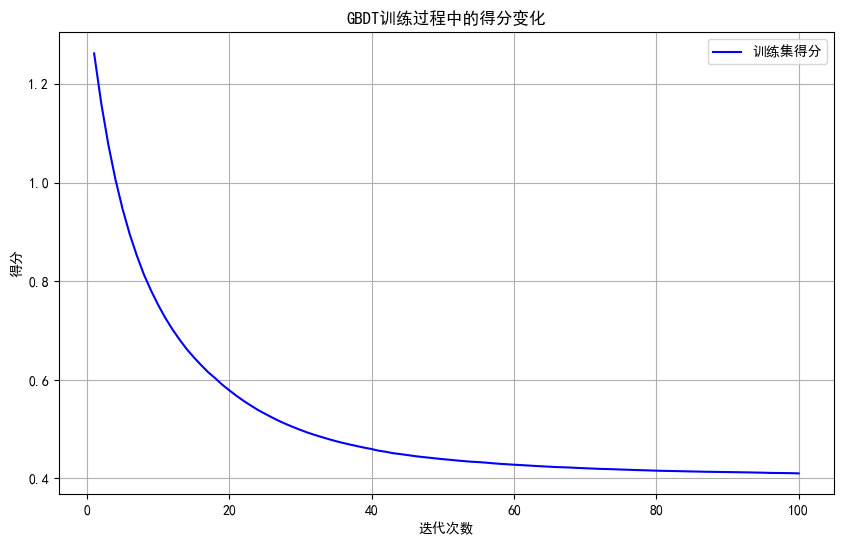

In [30]:
# 导入梯度提升决策树分类器
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

# 创建GBDT分类器
gbdt_clf = GradientBoostingClassifier(
    n_estimators=100,           # 弱分类器的数量
    learning_rate=0.1,          # 学习率
    max_depth=3,                # 决策树的最大深度
    min_samples_split=2,        # 分裂内部节点所需的最小样本数
    min_samples_leaf=1,         # 叶节点所需的最小样本数
    subsample=1.0,              # 用于拟合各个基础学习器的样本比例
    random_state=42             # 随机种子，确保结果可复现
)

# 训练GBDT分类器
gbdt_clf.fit(X_train, y_train)

# 预测
gbdt_pred = gbdt_clf.predict(X_test)
gbdt_accuracy = accuracy_score(y_test, gbdt_pred)

print("GBDT集成准确率:", gbdt_accuracy)

# 绘制GBDT的训练过程中的损失函数变化
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(gbdt_clf.train_score_) + 1), gbdt_clf.train_score_, 'b-', label='训练集得分')
plt.xlabel('迭代次数')
plt.ylabel('得分')
plt.title('GBDT训练过程中的得分变化')
plt.legend()
plt.grid(True)
plt.show()
